# Implementation of Machine Learning Models for Audio Files Classification

### Importing the required libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [69]:
data= pd.read_csv('Extracted_Data.csv')
data.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,...,8.810669,-3.667368,5.751690,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531574,blues
2,blues.00002.wav,0.363603,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459915,-29.109968,31.689013,...,5.789265,-8.905224,-1.083720,-9.218360,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,...,6.087676,-2.476421,-1.073891,-2.874778,0.780977,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703780,blues


In [70]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder() 
data['label']= x1.fit_transform(data['label'])  #Fitting the label obj to the data
data.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,...,8.810669,-3.667368,5.751690,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,0
1,blues.00001.wav,0.340983,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531574,0
2,blues.00002.wav,0.363603,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459915,-29.109968,31.689013,...,5.789265,-8.905224,-1.083720,-9.218360,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,0
3,blues.00003.wav,0.404779,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,...,6.087676,-2.476421,-1.073891,-2.874778,0.780977,-3.316932,0.637981,-0.619690,-3.408233,0
4,blues.00004.wav,0.308590,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703780,0


In [71]:
data.drop(['filename'],axis=1,inplace=True)
data.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,-6.376458,...,8.810669,-3.667368,5.751690,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,0
1,0.340983,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,2.916037,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531574,0
2,0.363603,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459915,-29.109968,31.689013,-13.987036,...,5.789265,-8.905224,-1.083720,-9.218360,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,0
3,0.404779,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754461,...,6.087676,-2.476421,-1.073891,-2.874778,0.780977,-3.316932,0.637981,-0.619690,-3.408233,0
4,0.308590,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,-32.489265,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703780,0


In [72]:
Y= data[['label']]

In [73]:
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(data)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.98520279, 0.99585078, 0.99830449, 0.99968235, 0.99980309,
       0.999856  , 0.99989463, 0.99991951, 0.99993668, 0.99995104,
       0.99995946, 0.99996561, 0.99997092, 0.9999758 , 0.99998   ,
       0.99998373, 0.99998705, 0.99998961, 0.99999173, 0.99999374,
       0.99999561, 0.99999718, 0.9999987 , 1.        , 1.        ,
       1.        ])

In [74]:
pca = PCA(n_components=25,whiten=True)
pca = pca.fit(data)
dataPCA = pd.DataFrame(pca.transform(data))

In [75]:
X= dataPCA
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

### Logistic Regression

In [76]:
LogReg= LogisticRegression()
LogReg= LogReg.fit(x_train,y_train)


print('Coeff: ',LogReg.coef_)
print('Intercept: ',LogReg.intercept_)

Coeff:  [[-1.42531395  0.3346573  -0.99888064 -0.19785523  0.58406434 -0.48293548
   1.07442491  0.34512619  1.10994809 -0.28494495 -0.31946949 -0.14127599
   0.08638106 -0.07674024  0.24432062  0.01014702  0.03105116 -0.54299286
  -2.02045079  1.70229081 -1.36512723  0.84226012  1.43765621  0.11384677
   0.02015137]
 [-1.91845549  0.68055392  0.86290489  1.42337976 -1.18676075  0.80271285
  -0.66183288 -0.39648874 -0.14637314 -0.23102148 -0.57313153 -0.17027645
  -0.44320161  0.18094232 -0.06662323 -0.25275682  0.21613329  0.00854622
  -1.01140645  1.25027597 -0.33324988  0.02861777  0.56458106  0.81017447
  -0.13433938]
 [-0.39840915 -0.72388915 -0.10982207 -0.77714009 -0.39620896  0.09556985
   0.05094722  0.73295003 -0.31527879  0.46494085 -0.52605093  0.2014236
   0.22806325  0.11710586  0.1760036  -0.21986458 -0.20604388 -0.31461001
  -0.38536686  0.89474062 -0.29042726  0.73697101  0.61019592  0.43128981
  -0.47989684]
 [ 1.12268001  0.21819818 -0.29949363 -0.06940453  0.0169703

In [77]:
y_pred= LogReg.predict(x_test)
print("Accuracy Score: ",metrics.accuracy_score(y_pred,y_test))

Accuracy Score:  0.795


In [78]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[15  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 5  1 19  1  1  0  0  0  0  0]
 [ 1  0  2 15  3  0  1  0  0  0]
 [ 0  1  1  2 15  1  3  0  0  0]
 [ 0  2  0  1  1 12  0  0  2  0]
 [ 0  0  0  0  0  0 19  1  0  0]
 [ 0  0  1  0  2  0  0 19  2  0]
 [ 0  0  0  0  0  1  0  1 12  1]
 [ 0  0  0  0  0  1  0  0  2 22]]


In [79]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
LogReg= multiclass_roc_auc_score(y_test,y_pred)
LogReg

0.8949537632545843

### Using KNN 

In [81]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
y_pred= knn.predict(x_test)
print("Accuracy Score: ",metrics.accuracy_score(y_pred,y_test))

Accuracy Score:  0.685


In [83]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[14  0  0  1  0  0  0  0  0  0]
 [ 0  9  0  0  0  2  0  0  0  0]
 [ 3  2 16  3  2  1  0  0  0  0]
 [ 1  1  1 14  3  0  0  2  0  0]
 [ 1  0  0  5 16  0  0  1  0  0]
 [ 0  3  0  1  1  9  0  1  1  2]
 [ 0  0  0  2  0  0 17  1  0  0]
 [ 0  0  2  0  0  0  1 20  1  0]
 [ 0  0  0  0  4  1  0  2  8  0]
 [ 0  0  0  0  1  2  1  3  4 14]]


In [84]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
KNN=multiclass_roc_auc_score(y_test,y_pred)
KNN

0.8301178084532914

### Using Decision Tree

In [86]:
dtc= DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
y_pred= dtc.predict(x_test)
print("Accuracy Score: ",metrics.accuracy_score(y_pred,y_test))

Accuracy Score:  0.455


In [88]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[12  0  0  1  0  1  1  0  0  0]
 [ 0  6  1  1  0  3  0  0  0  0]
 [ 6  3  6  3  1  4  1  0  2  1]
 [ 4  1  2  6  2  0  2  3  0  2]
 [ 4  0  2  0  9  1  1  0  4  2]
 [ 0  1  1  1  3  8  0  0  3  1]
 [ 1  0  1  0  2  0 13  0  2  1]
 [ 0  0  1  2  1  1  0 13  0  6]
 [ 1  0  0  0  2  0  1  2  6  3]
 [ 0  0  3  0  1  1  1  4  3 12]]


In [89]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
DT=multiclass_roc_auc_score(y_test,y_pred)
DT

0.7070492340453776

### Using Random Forest

In [91]:
rf= RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [92]:
y_pred= rf.predict(x_test)
print("Accuracy Score RandomForest: ",metrics.accuracy_score(y_test,y_pred))

Accuracy Score RandomForest:  0.695


In [93]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[15  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 2  2 13  4  0  5  1  0  0  0]
 [ 0  0  3 13  2  0  2  2  0  0]
 [ 0  0  1  1 14  1  2  0  2  2]
 [ 0  1  0  2  0 14  0  1  0  0]
 [ 0  0  0  1  1  0 16  1  0  1]
 [ 0  0  1  0  0  0  0 18  5  0]
 [ 0  0  1  0  3  1  0  1  8  1]
 [ 0  0  1  0  0  3  0  1  3 17]]


In [94]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
RF= multiclass_roc_auc_score(y_test,y_pred)
RF

0.8441242008605851

### Ada Boost Classifier

In [96]:
ada= AdaBoostClassifier(n_estimators=200,random_state=0)
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=0)

In [97]:
y_pred= ada.predict(x_test)
print("Accuracy Score of AdaBoost Classifier: ",metrics.accuracy_score(y_test,y_pred))

Accuracy Score of AdaBoost Classifier:  0.185


In [98]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[ 5  0  0  0  0  5  0  5  0  0]
 [ 0  4  0  0  0  7  0  0  0  0]
 [ 1  3  0  0  0 10  0 13  0  0]
 [ 1  0  0  0  0  0  0 21  0  0]
 [ 2  0  0  0  0  1  0 20  0  0]
 [ 1  0  0  0  0  6  0 11  0  0]
 [ 1  0  0  0  0  1  0 18  0  0]
 [ 1  1  0  0  0  0  0 22  0  0]
 [ 0  1  0  0  0  3  0 11  0  0]
 [ 0  0  0  0  0  6  0 19  0  0]]


In [99]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [100]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
AB= multiclass_roc_auc_score(y_test,y_pred)
AB

0.5515451802951803

### Gradient Boost Classifiier

In [101]:
gradient= GradientBoostingClassifier(n_estimators=200,random_state=0,max_depth=2)
gradient.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [102]:
y_pred= gradient.predict(x_test)
print("Accuracy Score of GradientBoost Classifier: ",metrics.accuracy_score(y_test,y_pred))

Accuracy Score of GradientBoost Classifier:  0.7


In [103]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[14  0  0  1  0  0  0  0  0  0]
 [ 0 10  0  0  0  1  0  0  0  0]
 [ 0  1 18  3  2  3  0  0  0  0]
 [ 0  0  0 14  6  0  2  0  0  0]
 [ 2  0  1  2 15  1  2  0  0  0]
 [ 0  3  0  1  1 11  0  0  0  2]
 [ 0  0  0  2  1  0 15  0  2  0]
 [ 0  0  2  0  2  1  0 17  2  0]
 [ 0  0  0  0  3  1  0  1  9  1]
 [ 0  0  0  0  0  3  1  1  3 17]]


In [104]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [105]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
GB= multiclass_roc_auc_score(y_test,y_pred)
GB

0.8406691152986685

### Using XG Boost Classifer

In [106]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [107]:
xgb_model = xgb.XGBClassifier()
optimization_dict = {'max_depth': [2,4,6],
                     'n_estimators': [50,100,200]}

model = GridSearchCV(xgb_model, optimization_dict, 
                     scoring='accuracy', verbose=1)

model.fit(x_train,y_train)
print(model.best_score_)
print(model.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   36.2s finished


0.72
{'max_depth': 2, 'n_estimators': 200}


In [108]:
XG= GradientBoostingClassifier(n_estimators=200,random_state=0,max_depth=2)
XG.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [109]:
y_pred= XG.predict(x_test)
print("Accuracy Score of XGBoost Classifier: ",metrics.accuracy_score(y_test,y_pred))

Accuracy Score of XGBoost Classifier:  0.7


In [110]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[14  0  0  1  0  0  0  0  0  0]
 [ 0 10  0  0  0  1  0  0  0  0]
 [ 0  1 18  3  2  3  0  0  0  0]
 [ 0  0  0 14  6  0  2  0  0  0]
 [ 2  0  1  2 15  1  2  0  0  0]
 [ 0  3  0  1  1 11  0  0  0  2]
 [ 0  0  0  2  1  0 15  0  2  0]
 [ 0  0  2  0  2  1  0 17  2  0]
 [ 0  0  0  0  3  1  0  1  9  1]
 [ 0  0  0  0  0  3  1  1  3 17]]


In [111]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [112]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
XG= multiclass_roc_auc_score(y_test,y_pred)
XG

0.8406691152986685

### Model Comparison

In [113]:
mc= pd.DataFrame([LogReg,KNN,DT,RF,AB,GB,XG],['Logistic Regression','KNN Classifier','Decision Tree','Random Forest','Ada-Boost','Gradient Boost','XG Boost'])
mc.columns=['ROC_AUC']
mc

,ROC_AUC
Logistic Regression,0.894954
KNN Classifier,0.830118
Decision Tree,0.707049
Random Forest,0.844124
Ada-Boost,0.551545
Gradient Boost,0.840669
XG Boost,0.840669


Text(0.5, 1.0, 'ML Model Comparison')

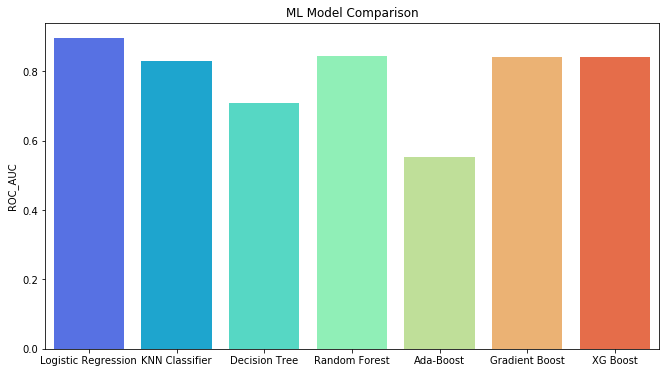

In [114]:
plt.figure(figsize=(11,6))
sns.barplot(mc.index,mc.ROC_AUC,palette='rainbow')
plt.title('ML Model Comparison')